In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

rooms = np.array([2, 2, 3, 3, 3, 4, 4, 5], dtype='float')
areas = np.array([800, 1000, 1200, 1400, 1500, 1800, 2000, 2500], dtype='float')
prices = np.array([2000, 3000, 4000, 4200, 4500, 5000, 5500, 6500])

# ***TASK -1***
### <font color='gray'>Plot Price vs #Rooms and Price vs Area</font>

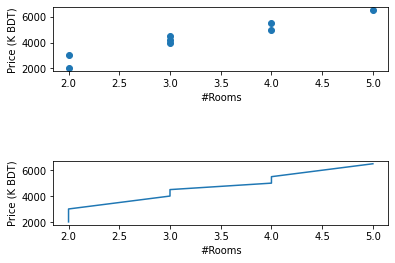

In [51]:
# PRICE VS NUMBER OF ROOMS

plt.subplot(3,1,1)
plt.xlabel('#Rooms')
plt.ylabel('Price (K BDT)')
plt.scatter(rooms,prices);

plt.subplot(3,1,3)
plt.xlabel('#Rooms')
plt.ylabel('Price (K BDT)')
plt.plot(rooms,prices);

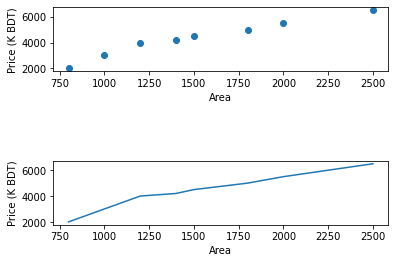

In [52]:
# PRICE VS AREA

plt.subplot(3,1,1)
plt.xlabel('Area')
plt.ylabel('Price (K BDT)')
plt.scatter(areas,prices);

plt.subplot(3,1,3)
plt.xlabel('Area')
plt.ylabel('Price (K BDT)')
plt.plot(areas,prices);

# ***TASK -2***
### <font color='gray'>Write Linear Regression Formula</font>


**Hypothesis Function:**<br>
> $ h_{\theta}(x) =  \theta^{T}X = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} $

>>1. $ \theta_{0},\theta_{1},\theta_{2} $ are the *Parameters* to make the best fit<br>
>>2. $ x_{1} = $ *Number of Rooms* , $ x_{2} = $ *Area* 

**Cost Function:**<br>
>$ J(\theta_{0},\theta_{1},\theta_{2}) = \frac{1}{2m}  \sum \limits _{j=1} ^{m} 
(h_{\theta}(x^{(i)}) - y^{(i)})^2$ <br>
&emsp;&emsp;&emsp;&emsp; Here we have to minimize this Cost Function(J)

# ***TASK -3***
### <font color='gray'>Implement Gradient Descent Optimization</font>


In [53]:
def get_scaled_val(val, max_val, min_val, avg_val):
  return (val-avg_val) / (max_val - min_val)

# OUR IMPLEMENTATION OF LINEAR REGRESSION
class My_multilinear_regression:
  cost = None

  def __init__(self, X, Y):
    self.X = X
    self.Y = Y
    self.m = X.shape[0]
    self.n = X.shape[1]
    self.Theta = None


  def feature_scale(self):
    '''
      THIS METHOD WILL SCALE THE FEATURE
    '''
    for i in range(1, self.X.shape[1]):
      arr = self.X[ : , i]
      max_val = max(arr)
      min_val = min(arr)
      avg_val = sum(arr) / len(arr)

      for j in range(len(arr)):
        arr[j] = get_scaled_val(arr[j], max_val, min_val, avg_val)
    

  def fit_line(self, num_of_itr = 1000, learning_rate = 0.01):
    Theta = np.ones(self.n)   
    costs = np.ones(num_of_itr)

    self.feature_scale()
    print('AFTER SCALING: ',self.X)
    h = np.dot(self.X, Theta)
     
    for i in range(num_of_itr):
      h = np.dot(self.X, Theta) # HYPOTHESIS FUNCTION
      costs[i] = (1/(2*self.m)) * sum(np.square(h-self.Y))
      
      for j in range(self.n):
        Theta[j] = Theta[j] - learning_rate * (1/self.m) * sum((h-self.Y) * self.X[:, j])

    
    # Theta[1] = get_scaled_val(Theta[1], 5, 2, 3.25)
    # Theta[1] = get_scaled_val(Theta[2], 2500,800,1525)

    self.Theta = Theta

    return self.Theta, costs

  def predict(self, input_vector):
    '''THIS METHOD WILL PREDICT THE
       THE OUTPUT VALUE'''
    return np.dot(input_vector, self.Theta);

       



In [54]:
# DRIVER CODE TO RUN THE IMPLEMENTED MODEL
x_0 = np.ones(8 , dtype= 'float') # CREATE COLUMN VECTOR WITH 1
X = np.column_stack((x_0, rooms,areas)) # CREATE X
Y = prices # TRUE VALUES

lin_reg = My_multilinear_regression(X,Y)
Theta,costs = lin_reg.fit_line()

AFTER SCALING:  [[ 1.         -0.41666667 -0.42647059]
 [ 1.         -0.41666667 -0.30882353]
 [ 1.         -0.08333333 -0.19117647]
 [ 1.         -0.08333333 -0.07352941]
 [ 1.         -0.08333333 -0.01470588]
 [ 1.          0.25        0.16176471]
 [ 1.          0.25        0.27941176]
 [ 1.          0.58333333  0.57352941]]


# ***TASK -4***
### <font color='gray'>Changes of Error</font>


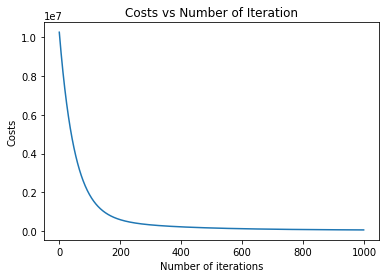

In [55]:
plt.title("Costs vs Number of Iteration")
plt.xlabel("Number of iterations")
plt.ylabel("Costs")
plt.plot(costs)

# ***TASK -5***
### <font color='gray'>Show the estimated model</font>


In [56]:
print('Parameters of our model: ',Theta)

Parameters of our model:  [4337.31278789 1779.02042607 1745.22550864]


# ***TASK -6***
### <font color='gray'>Calculate Total Loss</font>


In [57]:
y_predicted = [lin_reg.predict(i) for i in lin_reg.X]
m = lin_reg.m

total_loss = 1/m * sum(Y - y_predicted)**2
print('TOTAL LOSS:', total_loss)

TOTAL LOSS: 0.2803870062105973


# ***TASK -7***
### <font color='gray'>Generate some Test Data and Predic</font>


In [58]:
# GENERATE SOME TEST DATA
X_test_data = np.array([[ 1, -0.43, -0.42],
     [ 1, -0.42, -0.31],
     [ 1, -0.081, -0.2],
     [ 1, -0.081, -0.072],
     [ 1, -0.083, -0.014],
     [ 1, 0.26, 0.17],
     [ 1, 0.25, 0.27],
     [ 1, 0.6, 0.55]])

y_predicted_test = [lin_reg.predict(i) for i in X_test_data]

print('PREDICTED Y FROM TEST DATA: ', y_predicted_test)

PREDICTED Y FROM TEST DATA:  [2839.339291047745, 3049.104301258976, 3844.167031645944, 4067.555896752062, 4165.22093540114, 5096.546435131846, 5253.27878173534, 6364.599073278097]


# ***TASK -8***
### <font color='gray'>Use Python Library</font>


In [59]:
import pandas as pd
from sklearn import linear_model

df_X = pd.DataFrame(X, columns=['x_0','x_1','x_2'])
df_Y = pd.DataFrame(Y, columns=['y'])

lin_model = linear_model.LinearRegression()
lin_model.fit(df_X, df_Y)

LinearRegression()

# ***TASK -9***
### <font color='gray'>Repeat Tasks **5-7** and Compare</font>


&emsp;&emsp;***TASK - i*** <br>
&emsp;&emsp;<font color='gray'>Model Parameters Using library</font>


In [60]:
print(f'Parameters Using Model: {lin_model.intercept_[0]}, {lin_model.coef_[0][1]}, {lin_model.coef_[0][1]}')

Parameters Using Model: 4337.5, 792.2535211267568, 792.2535211267568


&emsp;&emsp;***TASK - ii*** <br>
&emsp;&emsp;<font color='gray'>Predict Using library Model</font>



In [63]:
# PREDICT USING PYTHON LIBRARY MODEL
y_predicted_model_2d = lin_model.predict(X)
y_predicted_model = np.array([i[0] for i in y_predicted_model_2d])
print('PREDICT Y FROM LIBRARY MODEL:', y_predicted_model)

PREDICT Y FROM LIBRARY MODEL: [2567.6056338  2964.78873239 3626.05633803 4023.23943662 4221.83098592
 5081.69014085 5478.87323944 6735.91549296]


&emsp;&emsp;***TASK - iii*** <br>
&emsp;&emsp;<font color='gray'>Calculate Loss Using library model</font>


In [64]:
# CALCULATE TOTAL LOSS
total_loss_model = 1/m * sum(Y - y_predicted_model)**2

print('TOTAL LOSS USING PYTHON LIBRARY MODEL: ', total_loss_model)

TOTAL LOSS USING PYTHON LIBRARY MODEL:  1.0339757656912846e-25


&emsp;&emsp;***TASK - iv*** <br>
&emsp;&emsp;<font color='gray'>Predict from Test data Using library model</font>


In [65]:
# PREDICT From Test Data using library model
y_test_predicted_model_2d = lin_model.predict(X_test_data)

print(y_test_predicted_model_2d)



[[2578.88732394]
 [2958.17605634]
 [3598.11619718]
 [4030.25140845]
 [4224.47816901]
 [5117.41549296]
 [5447.09859155]
 [6669.68309859]]


&emsp;&emsp;***TASK - v*** <br>
&emsp;&emsp;<font color='gray'>Compare</font>

In [66]:
print('TOTAL LOSS FROM OUR IMPLENATION:', total_loss)
print('TOTAL LOSS FROM PYTHON LIBRARY:', total_loss_model)

print('\n\n')
print('Y From Our Model              Y From library Model')
print('----------------              ---------------------')
for i in range(8):
  print(f'{y_predicted[i]}              {y_predicted_model[i]}')

TOTAL LOSS FROM OUR IMPLENATION: 0.2803870062105973
TOTAL LOSS FROM PYTHON LIBRARY: 1.0339757656912846e-25



Y From Our Model              Y From library Model
----------------              ---------------------
2851.7669277511413              2567.6056338028175
3057.087575826618              2964.788732394367
3855.4150325907835              3626.056338028169
4060.7356806662597              4023.2394366197186
4163.396004703998              4221.830985915493
5064.383785505902              5081.69014084507
5269.704433581378              5478.87323943662
6376.012862458758              6735.915492957745
